# HCL Project

# Aim
to optimize energy consumption by analyzing trends and predicting demand using PySpark’s MLlib. It helps organizations reduce costs, improve efficiency, and support sustainability.

# Section 1: Load the Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving energydata_complete(hcl project_dataset).csv to energydata_complete(hcl project_dataset).csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('energydata_complete(hcl project_dataset).csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# Section 2: Data Cleaning

Rename Columns

In [5]:
data.rename(columns = {
    'T1' : 'Temperature_in_kitchen',
    'RH_1' : 'Humidity_in_kitchen',
    'T2' : 'Temperature_in_living_room',
    'RH_2': 'Humidity_in_living_room',
    'T3':'Temperature_in_laundry_room',
    'RH_3':'Humidity_in_laundry_room',
    'T4': 'Temperature_in_office_room',
    'RH_4': 'Humidity_in_office_room',
    'T5': 'Temperature_in_bathroom',
    'RH_5':'Humodity_in_bathroom',
    'T6':'Temperature_outside_the_building',
    'RH_6':'Humidity_outside_the_building',
    'T7':'Temperature_in_ironing_room',
    'RH_7':'Humidity_in_ironing_room',
    'T8': 'Tempeature_in_teenager_room',
    'RH_8': 'Humidity_in_teenager_room',
    'T9':'Temperature_in_parents_room',
    'RH_9':'Humidity_in_parents_room',
    'T_out':'Temperature_outside_weather_satation',
    'Press_mm_hg':'Pressure_weather_station',
    'RH_out' :'Humidity_outside_weather_station'
}, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  19735 non-null  object 
 1   Appliances                            19735 non-null  int64  
 2   lights                                19735 non-null  int64  
 3   Temperature_in_kitchen                19735 non-null  float64
 4   Humidity_in_kitchen                   19735 non-null  float64
 5   Temperature_in_living_room            19735 non-null  float64
 6   Humidity_in_living_room               19735 non-null  float64
 7   Temperature_in_laundry_room           19735 non-null  float64
 8   Humidity_in_laundry_room              19735 non-null  float64
 9   Temperature_in_office_room            19735 non-null  float64
 10  Humidity_in_office_room               19735 non-null  float64
 11  Temperature_in_

Missing Values Inspection

In [8]:
#check missing values
print("Missing Values")
data.isnull().sum()

Missing Values


,0
date,0
Appliances,0
lights,0
Temperature_in_kitchen,0
Humidity_in_kitchen,0
Temperature_in_living_room,0
Humidity_in_living_room,0
Temperature_in_laundry_room,0
Humidity_in_laundry_room,0
Temperature_in_office_room,0


Insepection of Duplicate Rows

In [9]:
data.duplicated().sum()

0

Round off Values

In [10]:
data = data.round(2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  19735 non-null  object 
 1   Appliances                            19735 non-null  int64  
 2   lights                                19735 non-null  int64  
 3   Temperature_in_kitchen                19735 non-null  float64
 4   Humidity_in_kitchen                   19735 non-null  float64
 5   Temperature_in_living_room            19735 non-null  float64
 6   Humidity_in_living_room               19735 non-null  float64
 7   Temperature_in_laundry_room           19735 non-null  float64
 8   Humidity_in_laundry_room              19735 non-null  float64
 9   Temperature_in_office_room            19735 non-null  float64
 10  Humidity_in_office_room               19735 non-null  float64
 11  Temperature_in_

In [12]:
data.to_excel("cleaned_data.xlsx", index=False)
files.download("cleaned_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Section 3: Visualizing Data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data["date"] = pd.to_datetime(data["date"], format = '%d-%m-%Y %H:%M')

Plot 1: Energy Consumption Over Time

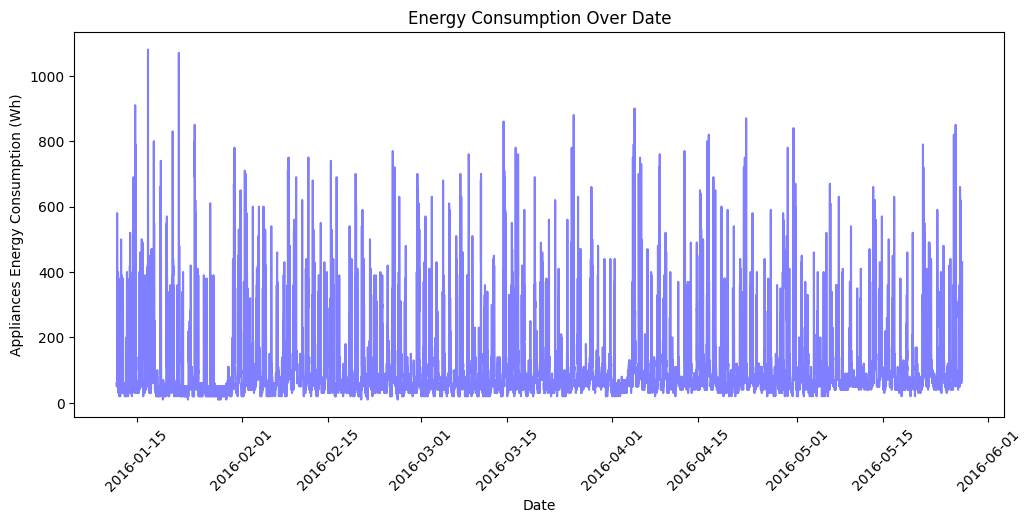

In [73]:
plt.figure(figsize=(12, 5))
plt.plot(data["date"], data["Appliances"], color='blue', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Appliances Energy Consumption (Wh)")
plt.title("Energy Consumption Over Date")
plt.xticks(rotation=45)
plt.show()

Plot 2: Outside Temperature vs Energy Consumption

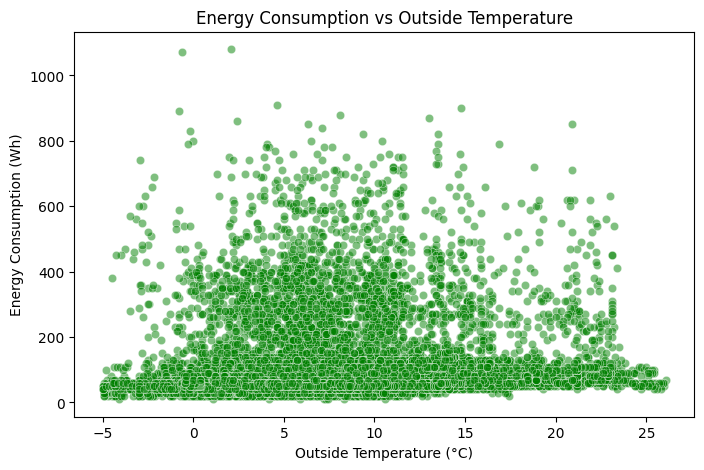

In [57]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Temperature_outside_weather_satation'], y=data['Appliances'], alpha=0.5, color='green')
plt.title("Energy Consumption vs Outside Temperature")
plt.xlabel("Outside Temperature (°C)")
plt.ylabel("Energy Consumption (Wh)")
plt.show()

# Section 4: EDA

Load the Dataset

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
dataset_path = "/content/cleaned_data_hcl_project.csv"
df = pd.read_csv(dataset_path)

In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  19735 non-null  object 
 1   Appliances                            19735 non-null  int64  
 2   lights                                19735 non-null  int64  
 3   Temperature_in_kitchen                19735 non-null  float64
 4   Humidity_in_kitchen                   19735 non-null  float64
 5   Temperature_in_living_room            19735 non-null  float64
 6   Humidity_in_living_room               19735 non-null  float64
 7   Temperature_in_laundry_room           19735 non-null  float64
 8   Humidity_in_laundry_room              19735 non-null  float64
 9   Temperature_in_office_room            19735 non-null  float64
 10  Humidity_in_office_room               19735 non-null  float64
 11  Temperature_in_

Compute Correlations with Appliances

In [65]:
correlation_values = df.corr()['Appliances'].abs().sort_values(ascending=False)

ValueError: could not convert string to float: '11-01-2016 17:00'

In [67]:
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y %H:%M', errors = 'coerce')

numerical_df = df.select_dtypes(include=['number'])
correlation_values = numerical_df.corr()['Appliances'].abs().sort_values(ascending=False)

Display top correlated features

In [68]:
top_correlations = correlation_values[1:6]
print(top_correlations)

lights                                  0.197278
Humidity_outside_weather_station        0.152283
Temperature_in_living_room              0.120075
Temperature_outside_the_building        0.117635
Temperature_outside_weather_satation    0.099154
Name: Appliances, dtype: float64


Heatmap of Correlations

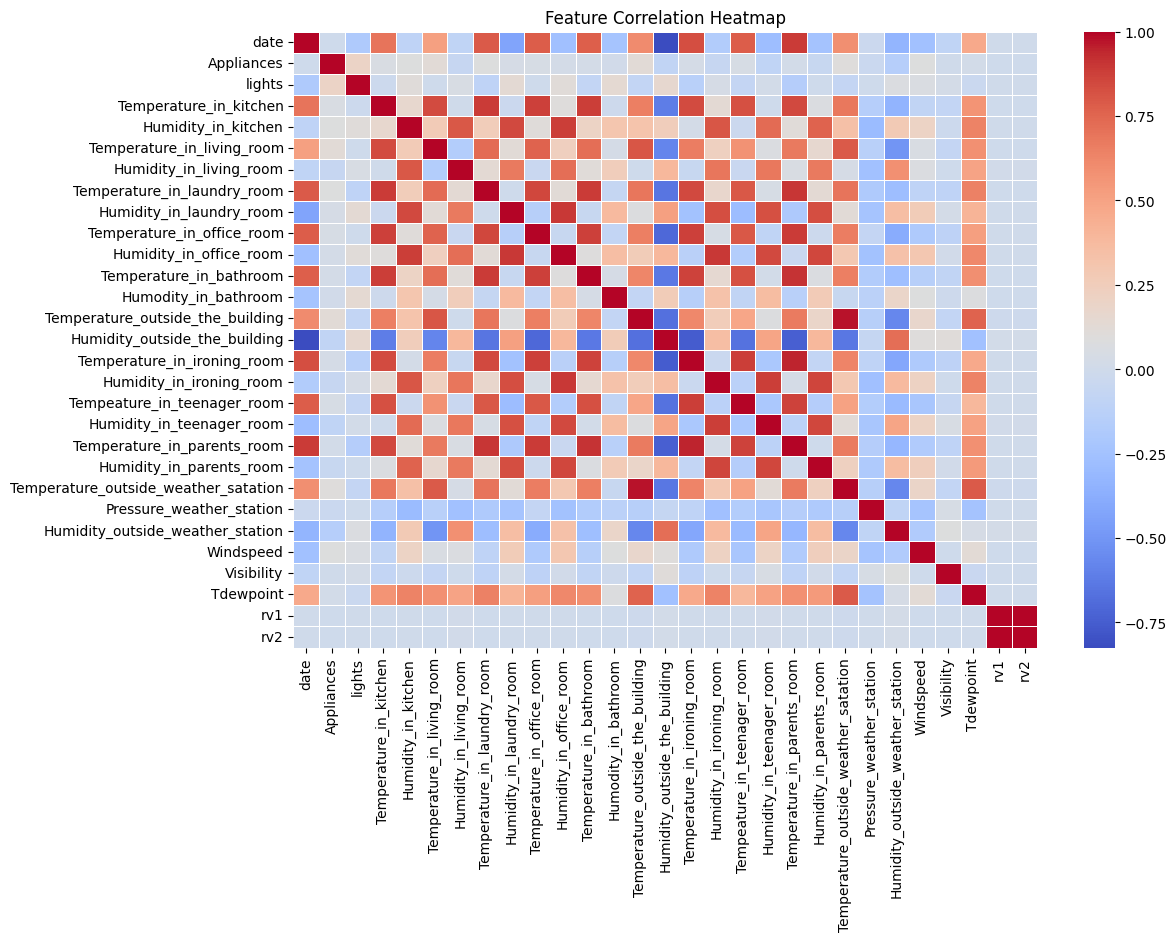

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

 Visualize Correlations


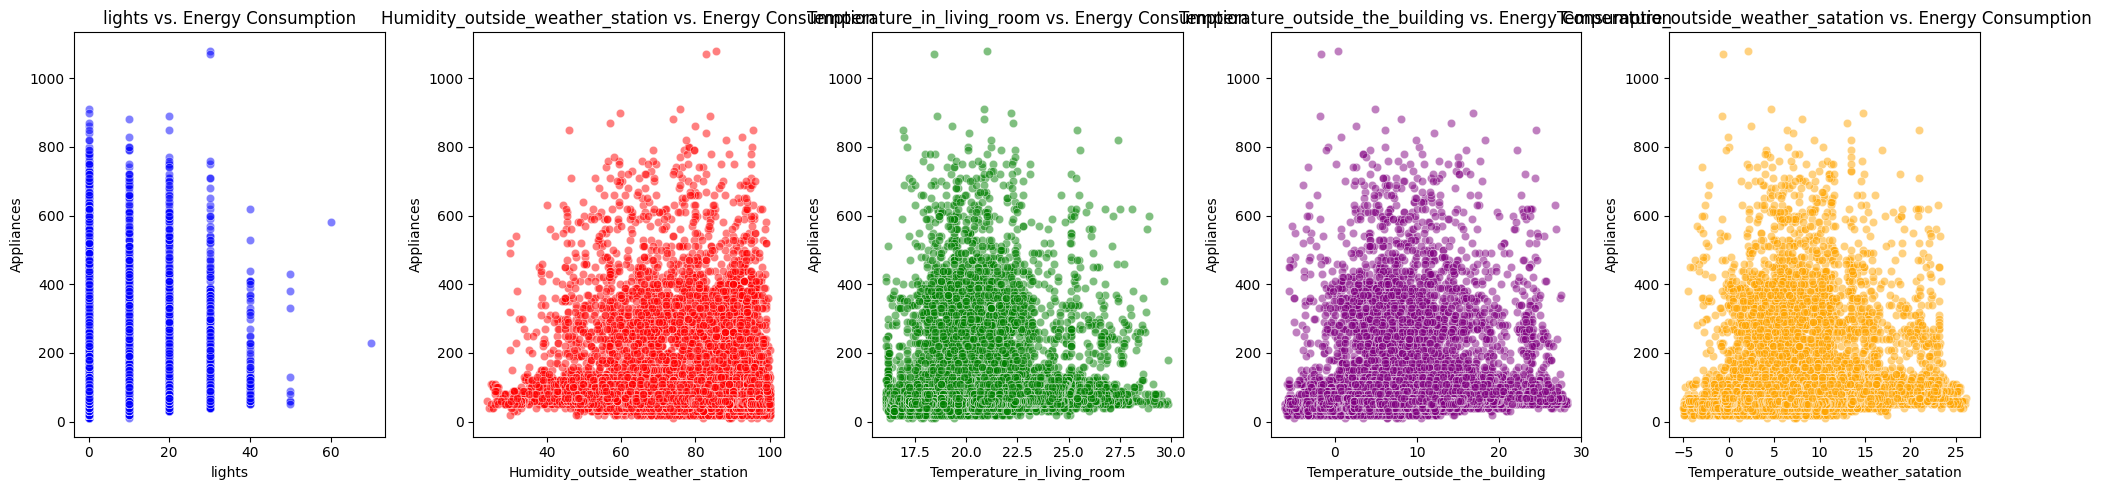

In [69]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

top_features = top_correlations.index.tolist()
colors = ["blue", "red", "green", "purple", "orange"]

for i, feature in enumerate(top_features):
    sns.scatterplot(x=df[feature], y=df['Appliances'], ax=axes[i], color=colors[i], alpha=0.5)
    axes[i].set_title(f"{feature} vs. Energy Consumption")

plt.tight_layout()
plt.show()

How energy usage changes over time.

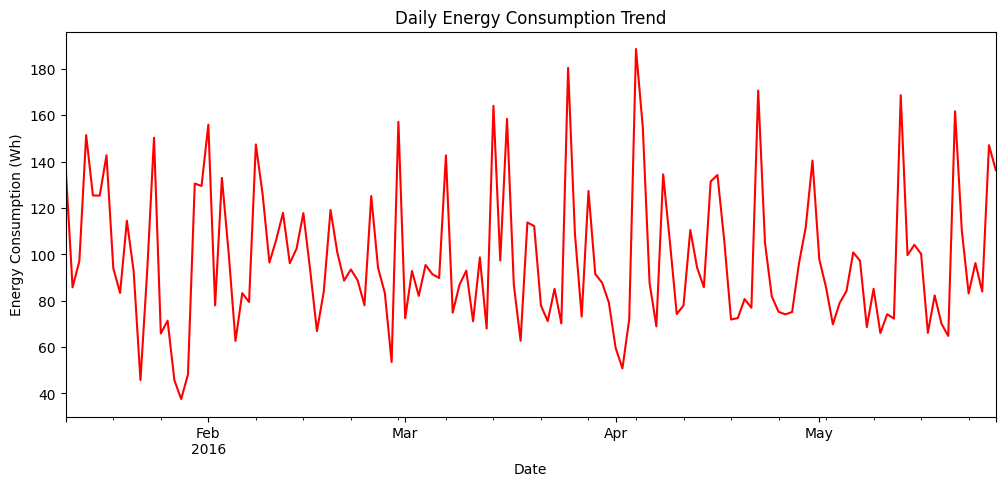

In [71]:
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y %H:%M', errors = 'coerce')
df.set_index('date', inplace=True)

df['Appliances'].resample('D').mean().plot(figsize=(12, 5), color="red", title="Daily Energy Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (Wh)")
plt.show()


# Section 5: SQL

In [17]:
import sqlite3

In [18]:
conn = sqlite3.connect("energy.db")
cursor = conn.cursor()

In [19]:
data.to_sql("EnergyConsumption", conn, if_exists="replace", index=False)

19735

Queries

Average Energy Consumption

In [20]:
query = '''SELECT AVG(Appliances) FROM EnergyConsumption'''
df_sql = pd.read_sql_query(query, conn)
print(df_sql)
df_sql = pd.read_sql_query(query, conn)
print(df_sql)

   AVG(Appliances)
0        97.694958
   AVG(Appliances)
0        97.694958


Maximum and Minimum Appliance Energy Consumption

In [21]:
query = """
SELECT MIN(Appliances) AS min_consumption,
MAX(Appliances) AS max_consumption
FROM EnergyConsumption; """
df_sql = pd.read_sql_query(query, conn)
print(df_sql)

   min_consumption  max_consumption
0               10             1080


Total Energy Consumption by Lights

In [22]:
query = """
SELECT SUM(lights) AS total_lights_consumption
FROM EnergyConsumption;
"""
df_sql = pd.read_sql_query(query, conn)
print(df_sql)

   total_lights_consumption
0                     75030


Hourly Energy Consumption Trend

In [23]:
query = """
SELECT strftime('%H', date) AS hour, AVG(Appliances) AS avg_consumption
FROM EnergyConsumption
GROUP BY hour
ORDER BY hour;
"""
df_sql = pd.read_sql_query(query, conn)
print(df_sql)

   hour  avg_consumption
0    00        52.785888
1    01        51.326034
2    02        49.075426
3    03        48.236010
4    04        49.355231
5    05        52.737226
6    06        57.712895
7    07        78.649635
8    08       106.143552
9    09       112.785888
10   10       125.377129
11   11       133.126521
12   12       123.637470
13   13       124.744526
14   14       108.284672
15   15       105.827251
16   16       119.902676
17   17       161.352657
18   18       190.364520
19   19       143.065693
20   20       126.982968
21   21        96.496350
22   22        69.148418
23   23        56.982968


# Section 6: PySpark

In [24]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("HCL Project").getOrCreate()

In [26]:
df = spark.read.csv("/content/cleaned_data_hcl_project.csv", header=True, inferSchema=True)
df.show()

+----------------+----------+------+----------------------+-------------------+--------------------------+-----------------------+---------------------------+------------------------+--------------------------+-----------------------+-----------------------+--------------------+--------------------------------+-----------------------------+---------------------------+------------------------+---------------------------+-------------------------+---------------------------+------------------------+------------------------------------+------------------------+--------------------------------+---------+----------+---------+-----+-----+
|            date|Appliances|lights|Temperature_in_kitchen|Humidity_in_kitchen|Temperature_in_living_room|Humidity_in_living_room|Temperature_in_laundry_room|Humidity_in_laundry_room|Temperature_in_office_room|Humidity_in_office_room|Temperature_in_bathroom|Humodity_in_bathroom|Temperature_outside_the_building|Humidity_outside_the_building|Temperature_in_ir

Structure of the DataFrame

In [27]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- Appliances: integer (nullable = true)
 |-- lights: integer (nullable = true)
 |-- Temperature_in_kitchen: double (nullable = true)
 |-- Humidity_in_kitchen: double (nullable = true)
 |-- Temperature_in_living_room: double (nullable = true)
 |-- Humidity_in_living_room: double (nullable = true)
 |-- Temperature_in_laundry_room: double (nullable = true)
 |-- Humidity_in_laundry_room: double (nullable = true)
 |-- Temperature_in_office_room: double (nullable = true)
 |-- Humidity_in_office_room: double (nullable = true)
 |-- Temperature_in_bathroom: double (nullable = true)
 |-- Humodity_in_bathroom: double (nullable = true)
 |-- Temperature_outside_the_building: double (nullable = true)
 |-- Humidity_outside_the_building: double (nullable = true)
 |-- Temperature_in_ironing_room: double (nullable = true)
 |-- Humidity_in_ironing_room: double (nullable = true)
 |-- Tempeature_in_teenager_room: double (nullable = true)
 |-- Humidity_in_teenager

List of Column Names

In [28]:
df.columns

['date',
 'Appliances',
 'lights',
 'Temperature_in_kitchen',
 'Humidity_in_kitchen',
 'Temperature_in_living_room',
 'Humidity_in_living_room',
 'Temperature_in_laundry_room',
 'Humidity_in_laundry_room',
 'Temperature_in_office_room',
 'Humidity_in_office_room',
 'Temperature_in_bathroom',
 'Humodity_in_bathroom',
 'Temperature_outside_the_building',
 'Humidity_outside_the_building',
 'Temperature_in_ironing_room',
 'Humidity_in_ironing_room',
 'Tempeature_in_teenager_room',
 'Humidity_in_teenager_room',
 'Temperature_in_parents_room',
 'Humidity_in_parents_room',
 'Temperature_outside_weather_satation',
 'Pressure_weather_station',
 'Humidity_outside_weather_station',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

Selected Columns

In [29]:
df.select("Appliances","Temperature_outside_weather_satation").show()

+----------+------------------------------------+
|Appliances|Temperature_outside_weather_satation|
+----------+------------------------------------+
|        60|                                 6.6|
|        60|                                6.48|
|        50|                                6.37|
|        50|                                6.25|
|        60|                                6.13|
|        50|                                6.02|
|        60|                                 5.9|
|        60|                                5.92|
|        60|                                5.93|
|        70|                                5.95|
|       230|                                5.97|
|       580|                                5.98|
|       430|                                 6.0|
|       250|                                 6.0|
|       100|                                 6.0|
|       100|                                 6.0|
|        90|                                 6.0|


Filter Data

In [30]:
print("Count of appliances greater than 150 is:\n")
df.filter(df.Appliances > 150).count()
print("The list of those appliance is shown below: \n")
df.filter(df.Appliances > 150).show()

Count of appliances greater than 150 is:

The list of those appliance is shown below: 

+----------------+----------+------+----------------------+-------------------+--------------------------+-----------------------+---------------------------+------------------------+--------------------------+-----------------------+-----------------------+--------------------+--------------------------------+-----------------------------+---------------------------+------------------------+---------------------------+-------------------------+---------------------------+------------------------+------------------------------------+------------------------+--------------------------------+---------+----------+---------+-----+-----+
|            date|Appliances|lights|Temperature_in_kitchen|Humidity_in_kitchen|Temperature_in_living_room|Humidity_in_living_room|Temperature_in_laundry_room|Humidity_in_laundry_room|Temperature_in_office_room|Humidity_in_office_room|Temperature_in_bathroom|Humodity_in_b

In [31]:
from pyspark.sql.functions import avg, count, min, max

In [32]:
df.createOrReplaceTempView("HCL_Energy")

Round of all Columns

In [33]:
query = """
SELECT
       ROUND(Temperature_in_kitchen, 2) AS Kitchen_Temperature,
       ROUND(Humidity_in_kitchen, 2) AS Kitchen_Humidity,

       ROUND(Temperature_in_living_room, 2) AS Living_Room_Temperature,
       ROUND(Humidity_in_living_room, 2) AS Living_Room_Humidity,

       ROUND(Temperature_in_laundry_room, 2) AS Laundry_Room_Temperature,
       ROUND(Humidity_in_laundry_room, 2) AS Laundry_Room_Humidity,

       ROUND(Temperature_in_office_room, 2) AS Office_Temperature,
       ROUND(Humidity_in_office_room, 2) AS Office_Humidity,

       ROUND(Temperature_in_bathroom, 2) AS Bathroom_Temperature,
       ROUND(Humodity_in_bathroom, 2) AS Bathroom_Humidity,

       ROUND(Temperature_outside_the_building, 2) AS Outside_Building_Temperature,
       ROUND(Humidity_outside_the_building, 2) AS Outside_Building_Humidity,

       ROUND(Temperature_in_ironing_room, 2) AS Ironing_Room_Temperature,
       ROUND(Humidity_in_ironing_room, 2) AS Ironing_Room_Humidity,

       ROUND(Tempeature_in_teenager_room, 2) AS Teenager_Room_Temperature,
       ROUND(Humidity_in_teenager_room, 2) AS Teenager_Room_Humidity,

       ROUND(Temperature_in_parents_room, 2) AS Parents_Room_Temperature,
       ROUND(Humidity_in_parents_room, 2) AS Parents_Room_Humidity,

       ROUND(Temperature_outside_weather_satation, 2) AS Weather_Station_Temperature,
       ROUND(Pressure_weather_station, 2) AS Weather_Station_Pressure,
       ROUND(Humidity_outside_weather_station, 2) AS Weather_Station_Humidity,

       ROUND(Windspeed, 2) AS Wind_Speed,
       ROUND(Visibility, 2) AS Visibility_KM,
       ROUND(Tdewpoint, 2) AS Dew_Point,

       ROUND(rv1, 2) AS Random_Variable_1,
       ROUND(rv2, 2) AS Random_Variable_2

FROM HCL_Energy
"""

rounded_df = spark.sql(query)
rounded_df.show()

+-------------------+----------------+-----------------------+--------------------+------------------------+---------------------+------------------+---------------+--------------------+-----------------+----------------------------+-------------------------+------------------------+---------------------+-------------------------+----------------------+------------------------+---------------------+---------------------------+------------------------+------------------------+----------+-------------+---------+-----------------+-----------------+
|Kitchen_Temperature|Kitchen_Humidity|Living_Room_Temperature|Living_Room_Humidity|Laundry_Room_Temperature|Laundry_Room_Humidity|Office_Temperature|Office_Humidity|Bathroom_Temperature|Bathroom_Humidity|Outside_Building_Temperature|Outside_Building_Humidity|Ironing_Room_Temperature|Ironing_Room_Humidity|Teenager_Room_Temperature|Teenager_Room_Humidity|Parents_Room_Temperature|Parents_Room_Humidity|Weather_Station_Temperature|Weather_Station_Pr

Categories Appliances

In [34]:
query = """
SELECT *,
       CASE
           WHEN Appliances > 300 THEN 'Very High'
           WHEN Appliances > 200 THEN 'High'
           WHEN Appliances > 100 THEN 'Medium'
           WHEN Appliances > 50 THEN 'Low'
           ELSE 'Very Low'
       END AS energy_category
FROM HCL_Energy
"""

energy_df = spark.sql(query)
energy_df.show()

+----------------+----------+------+----------------------+-------------------+--------------------------+-----------------------+---------------------------+------------------------+--------------------------+-----------------------+-----------------------+--------------------+--------------------------------+-----------------------------+---------------------------+------------------------+---------------------------+-------------------------+---------------------------+------------------------+------------------------------------+------------------------+--------------------------------+---------+----------+---------+-----+-----+---------------+
|            date|Appliances|lights|Temperature_in_kitchen|Humidity_in_kitchen|Temperature_in_living_room|Humidity_in_living_room|Temperature_in_laundry_room|Humidity_in_laundry_room|Temperature_in_office_room|Humidity_in_office_room|Temperature_in_bathroom|Humodity_in_bathroom|Temperature_outside_the_building|Humidity_outside_the_building|T

In [35]:
rounded_df.write.csv("/content/rounded_data.csv", header=True, mode="overwrite")

# Section 6.1 : Pyspark_RDD

Convert DataFrame to RDD

In [36]:
rdd = df.rdd

In [37]:
print(rdd.take(5))


[Row(date='11-01-2016 17:00', Appliances=60, lights=30, Temperature_in_kitchen=19.89, Humidity_in_kitchen=47.6, Temperature_in_living_room=19.2, Humidity_in_living_room=44.79, Temperature_in_laundry_room=19.79, Humidity_in_laundry_room=44.73, Temperature_in_office_room=19.0, Humidity_in_office_room=45.57, Temperature_in_bathroom=17.17, Humodity_in_bathroom=55.2, Temperature_outside_the_building=7.03, Humidity_outside_the_building=84.26, Temperature_in_ironing_room=17.2, Humidity_in_ironing_room=41.63, Tempeature_in_teenager_room=18.2, Humidity_in_teenager_room=48.9, Temperature_in_parents_room=17.03, Humidity_in_parents_room=45.53, Temperature_outside_weather_satation=6.6, Pressure_weather_station=733.5, Humidity_outside_weather_station=92.0, Windspeed=7.0, Visibility=63.0, Tdewpoint=5.3, rv1=13.28, rv2=13.28), Row(date='11-01-2016 17:10', Appliances=60, lights=30, Temperature_in_kitchen=19.89, Humidity_in_kitchen=46.69, Temperature_in_living_room=19.2, Humidity_in_living_room=44.72, T

Maximum Wind Speed

In [38]:
windspeed_rdd = rdd.map(lambda row: row.Windspeed)
top_windspeed = windspeed_rdd.max()
print(f"Top Wind Speed: {top_windspeed} m/s")

Top Wind Speed: 14.0 m/s


Average Visibility

In [42]:
visibility_rdd = df.select("Visibility").rdd
avg_visibility = visibility_rdd.map(lambda row: row.Visibility).mean()
print(f"Average Visibility: {avg_visibility:.2f} KM")

Average Visibility: 38.33 KM


Categories Visiblity

In [44]:
from pyspark.sql.functions import col, when

In [46]:
df = df.withColumn(
    "Visibility_Category",
    when(col("Visibility") <= 40, "Low Visibility")
    .when((col("Visibility") > 40) & (col("Visibility") <= 45), "Moderate Visibility")
    .when((col("Visibility") > 45) & (col("Visibility") <= 50), "Good Visibility")
    .otherwise("Excellent Visibility")
)

df.select("Visibility", "Visibility_Category").show(10)

+----------+--------------------+
|Visibility| Visibility_Category|
+----------+--------------------+
|      63.0|Excellent Visibility|
|     59.17|Excellent Visibility|
|     55.33|Excellent Visibility|
|      51.5|Excellent Visibility|
|     47.67|     Good Visibility|
|     43.83| Moderate Visibility|
|      40.0|      Low Visibility|
|      40.0|      Low Visibility|
|      40.0|      Low Visibility|
|      40.0|      Low Visibility|
+----------+--------------------+
only showing top 10 rows



Count of Visibility Categories

In [49]:
df.select("Visibility", "Visibility_Category").count()

19735

Count of Visibility Categories

In [52]:
visibility_rdd = df.select("Visibility_Category").rdd.map(lambda row: row.Visibility_Category)

category_counts = visibility_rdd.map(lambda category: (category, 1)).reduceByKey(lambda a, b: a + b).collect()

for category, count in category_counts:
    print(f"{category}: {count}")


Excellent Visibility: 3035
Good Visibility: 525
Moderate Visibility: 533
Low Visibility: 15642


Convert RDD to DataFrame

In [54]:
from pyspark.sql import Row

visibility_rdd = df.select("Visibility", "Visibility_Category").rdd

visibility_df = spark.createDataFrame(
    visibility_rdd.map(lambda row: Row(Visibility_KM=row[0], Category=row[1]))
)

visibility_df.show()

+-------------+--------------------+
|Visibility_KM|            Category|
+-------------+--------------------+
|         63.0|Excellent Visibility|
|        59.17|Excellent Visibility|
|        55.33|Excellent Visibility|
|         51.5|Excellent Visibility|
|        47.67|     Good Visibility|
|        43.83| Moderate Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
|         40.0|      Low Visibility|
+-------------+--------------------+
only showing top 20 rows



In [55]:
spark.stop()